In [10]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the back end (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

#Draw the citcuit
circuit.draw()


Total count for 00 and 11 are: {'11': 500049, '00': 499951}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

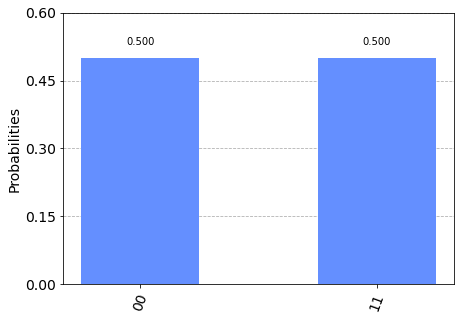

In [11]:
# Plot a histogram
plot_histogram(counts)

In [38]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

In [22]:
IBMQ.save_account('your API token')

configrc.store_credentials:WARNING:2022-01-06 01:49:07,472: Credentials already present. Set overwrite=True to overwrite.


In [23]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-01-06 01:49:16,265: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [33]:
providers = IBMQ.providers()
provider = IBMQ.get_provider(hub='ibm-q')
print(provider.backends())
backend = provider.get_backend('ibmq_manila')
print(backend)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

In [40]:
# Use IBM quantum experience
provider = IBMQ.get_provider(hub='ibm-q')

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                    and not x.configuration().simulator
                                    and x.status().operational==True))

print(backend)

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the back end (not needed for simple circuits)
compiled_circuit = transpile(circuit, backend)

# Execute the circuit on the qasm simulator
job = backend.run(compiled_circuit, shots=20000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

#Draw the citcuit
circuit.draw()

ibmq_belem

Total count for 00 and 11 are: {'00': 9544, '01': 610, '10': 540, '11': 9306}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

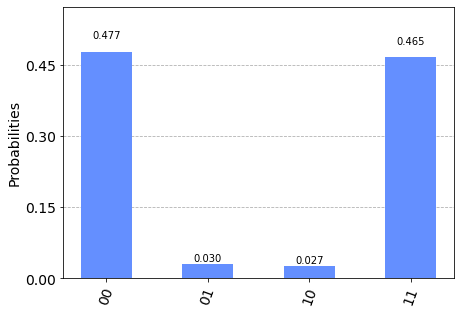

In [41]:
# Plot a histogram
plot_histogram(counts)